## Imports

In [15]:
import pandas as pd
import numpy as np
import MDP as mdp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import kernel_ridge
from tqdm import tqdm

## Read Data

In [2]:
X_data = pd.read_csv('./data/X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
X_data = X_data.reshape((84,720))

Y_data = pd.read_csv('./data/Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
Y_data = Y_data.reshape((84,720))

block_names = pd.read_csv('./data/block_names.csv')
block_names = np.array(block_names['0'].tolist())

## Split Training/Test Data

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=1/7, random_state=42)
print('Training Data Size:', len(x_train))
print('Testing Data Size:', len(x_test))

Training Data Size: 72
Testing Data Size: 12


## K-Mean Clustering

In [4]:
n_clusters = 4
kmeans = KMeans(n_clusters)
kmeans.fit(x_train)
clusters = kmeans.predict(x_train)

In [5]:
x_bins = [[], [], [], []]
y_bins = [[], [], [], []]
label_bins = [[], [], [], []]
for cluster, i in zip(clusters, range(len(clusters))):
    x_bins[cluster].append(x_train[i])
    y_bins[cluster].append(y_train[i])
    label_bins[cluster].append(block_names[i])

In [6]:
# To visualize the data use PCA to reduce dimension to 2 and plot scatter plot
pca_2d = PCA(n_components=2)
PCA_2d = pca_2d.fit_transform(x_train)

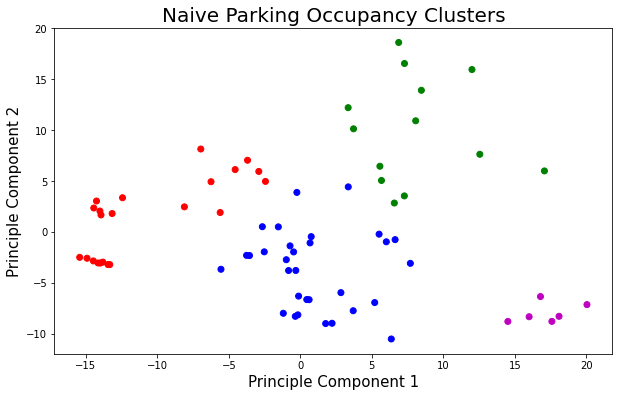

In [7]:
colors = ['b', 'g', 'r', 'm', 'y']
color_map = []
for index in clusters:
    color_map.append(colors[index])
plt.figure(figsize=(10,6))
plt.scatter(PCA_2d[:,0], PCA_2d[:,1], color=color_map)
plt.title("Naive Parking Occupancy Clusters", fontsize=20)
plt.ylabel("Principle Component 2", fontsize=15)
plt.xlabel("Principle Component 1", fontsize=15)
plt.show()

 ## Based Case Test

In [16]:
lambda_val = 0.1
gamma = 0.001
rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

In [17]:
rrg.fit(x_train, y_train)
y_pred = rrg.predict(x_test)
mae = np.mean(np.abs(y_test-y_pred))
print('Base Case Accuracy:', 1-mae)

Base Case Accuracy: 0.8798653098369773


## Q-Learning

In [18]:
train_data = (x_bins, y_bins)
test_data = (x_test, y_test)
max_bins = [len(x_bins[i]) for i in range(n_clusters)]
print('max bins:', max_bins)

max bins: [31, 13, 22, 6]


In [19]:
model = mdp.BanditMDP(train_data, test_data, max_bins)
samples = 36
model.set_goal(samples)

In [27]:
# Need about 10000000 iterations to converge
n_iteration = 10000000
for i in tqdm(range(n_iteration)):
    model.run_iteration()

100%|██████████| 10000000/10000000 [01:38<00:00, 101968.21it/s]


In [22]:
model.get_policy()
for key in model.policy.keys():
    if sum(key.bins) == samples:
        print('State:', key.bins)
        print('Policy:', model.policy[key])
        print('Value:', model.q_table[key][0])

State: [8, 9, 15, 4]
Policy: 0
Value: 0.8587504088068123
State: [8, 10, 15, 3]
Policy: 0
Value: 0.8592777180805728
State: [13, 13, 4, 6]
Policy: 0
Value: 0.8377534541331741
State: [14, 12, 5, 5]
Policy: 0
Value: 0.8335835516033665
State: [15, 12, 4, 5]
Policy: 0
Value: 0.841136716019101
State: [14, 13, 4, 5]
Policy: 0
Value: 0.8385021740186147
State: [11, 3, 18, 4]
Policy: 0
Value: 0
State: [10, 3, 19, 4]
Policy: 0
Value: 0.8586156149956159
State: [10, 2, 20, 4]
Policy: 0
Value: 0
State: [10, 3, 20, 3]
Policy: 0
Value: 0
State: [10, 2, 18, 6]
Policy: 0
Value: 0
State: [6, 3, 22, 5]
Policy: 0
Value: 0
State: [4, 7, 22, 3]
Policy: 0
Value: 0
State: [3, 7, 22, 4]
Policy: 0
Value: 0.8228316344300524
State: [4, 6, 22, 4]
Policy: 0
Value: 0
State: [4, 5, 22, 5]
Policy: 0
Value: 0
State: [5, 5, 22, 4]
Policy: 0
Value: 0.8377997962792315
State: [5, 6, 22, 3]
Policy: 0
Value: 0
State: [5, 6, 21, 4]
Policy: 0
Value: 0
State: [5, 5, 21, 5]
Policy: 0
Value: 0
State: [6, 5, 21, 4]
Policy: 0
Value: 

Value: 0.8589725455361404
State: [15, 2, 13, 6]
Policy: 0
Value: 0.8568897664756321
State: [4, 9, 21, 2]
Policy: 0
Value: 0
State: [4, 10, 19, 3]
Policy: 0
Value: 0.8386313789561776
State: [2, 10, 22, 2]
Policy: 0
Value: 0
State: [1, 9, 22, 4]
Policy: 0
Value: 0
State: [11, 6, 15, 4]
Policy: 0
Value: 0
State: [10, 7, 14, 5]
Policy: 0
Value: 0.8583192983406422
State: [9, 8, 15, 4]
Policy: 0
Value: 0.8571270114638493
State: [10, 7, 15, 4]
Policy: 0
Value: 0.8588104162072641
State: [12, 7, 13, 4]
Policy: 0
Value: 0.8572811298077105
State: [11, 11, 8, 6]
Policy: 3
Value: 0
State: [12, 11, 8, 5]
Policy: 0
Value: 0.853984016528502
State: [17, 8, 11, 0]
Policy: 0
Value: 0.8612449452958517
State: [2, 10, 20, 4]
Policy: 0
Value: 0
State: [0, 10, 22, 4]
Policy: 0
Value: 0.8412290275439862
State: [8, 12, 11, 5]
Policy: 0
Value: 0.8546835667771693
State: [9, 10, 12, 5]
Policy: -2
Value: 0
State: [10, 11, 12, 3]
Policy: 4
Value: 0
State: [10, 12, 12, 2]
Policy: -3
Value: 0
State: [15, 13, 3, 5]
Pol

Value: 0
State: [13, 4, 19, 0]
Policy: 0
Value: 0
State: [13, 4, 18, 1]
Policy: 0
Value: 0
State: [12, 4, 19, 1]
Policy: 0
Value: 0
State: [15, 2, 17, 2]
Policy: 0
Value: 0.8557213471283734
State: [23, 5, 7, 1]
Policy: 0
Value: 0.8520908408059056
State: [18, 2, 14, 2]
Policy: 0
Value: 0.8605987017176042
State: [17, 3, 14, 2]
Policy: 0
Value: 0
State: [19, 3, 14, 0]
Policy: 0
Value: 0
State: [19, 2, 15, 0]
Policy: 0
Value: 0.8606745863168753
State: [19, 1, 16, 0]
Policy: 0
Value: 0
State: [19, 1, 15, 1]
Policy: 0
Value: 0
State: [20, 2, 14, 0]
Policy: 0
Value: 0
State: [18, 3, 14, 1]
Policy: 0
Value: 0
State: [18, 4, 13, 1]
Policy: 0
Value: 0
State: [9, 6, 15, 6]
Policy: 0
Value: 0.851297183637264
State: [11, 9, 15, 1]
Policy: 0
Value: 0.8609927511463202
State: [9, 4, 19, 4]
Policy: 0
Value: 0.8558727159405275
State: [12, 8, 15, 1]
Policy: 0
Value: 0.8574044706429889
State: [5, 11, 14, 6]
Policy: 0
Value: 0.8367916501656392
State: [20, 4, 8, 4]
Policy: 0
Value: 0
State: [21, 5, 7, 3]
Po

Policy: 0
Value: 0.8490372829104947
State: [16, 2, 13, 5]
Policy: 0
Value: 0
State: [22, 1, 11, 2]
Policy: 0
Value: 0
State: [12, 9, 14, 1]
Policy: 0
Value: 0
State: [12, 7, 11, 6]
Policy: -3
Value: 0
State: [16, 8, 12, 0]
Policy: 0
Value: 0
State: [7, 10, 16, 3]
Policy: -2
Value: 0
State: [8, 8, 19, 1]
Policy: 0
Value: 0
State: [7, 7, 18, 4]
Policy: 0
Value: 0
State: [8, 6, 18, 4]
Policy: 0
Value: 0.856077793525041
State: [11, 11, 12, 2]
Policy: 0
Value: 0
State: [2, 9, 22, 3]
Policy: 0
Value: 0.8449222972469336
State: [1, 11, 22, 2]
Policy: 0
Value: 0
State: [13, 5, 15, 3]
Policy: 0
Value: 0
State: [12, 5, 18, 1]
Policy: 0
Value: 0.8542917069615223
State: [12, 6, 12, 6]
Policy: 0
Value: 0.8504285534463579
State: [8, 3, 19, 6]
Policy: 0
Value: 0
State: [18, 8, 8, 2]
Policy: 0
Value: 0
State: [20, 7, 9, 0]
Policy: 0
Value: 0.8561023081776216
State: [7, 9, 17, 3]
Policy: -3
Value: 0
State: [6, 10, 18, 2]
Policy: 0
Value: 0
State: [6, 11, 17, 2]
Policy: 0
Value: 0
State: [23, 4, 7, 2]
Po

In [28]:
sol = model.get_solution()

curr_state [0, 0, 0, 0]
action: 1
curr_state [1, 0, 0, 0]
action: 1
curr_state [2, 0, 0, 0]
action: 1
curr_state [3, 0, 0, 0]
action: 1
curr_state [4, 0, 0, 0]
action: 1
curr_state [5, 0, 0, 0]
action: 1
curr_state [6, 0, 0, 0]
action: 1
curr_state [7, 0, 0, 0]
action: 1
curr_state [8, 0, 0, 0]
action: 1
curr_state [9, 0, 0, 0]
action: 1
curr_state [10, 0, 0, 0]
action: 1
curr_state [11, 0, 0, 0]
action: 1
curr_state [12, 0, 0, 0]
action: 1
curr_state [13, 0, 0, 0]
action: 1
curr_state [14, 0, 0, 0]
action: 1
curr_state [15, 0, 0, 0]
action: 1
curr_state [16, 0, 0, 0]
action: 1
curr_state [17, 0, 0, 0]
action: 1
curr_state [18, 0, 0, 0]
action: 3
curr_state [18, 0, 1, 0]
action: 3
curr_state [18, 0, 2, 0]
action: 3
curr_state [18, 0, 3, 0]
action: 3
curr_state [18, 0, 4, 0]
action: 3
curr_state [18, 0, 5, 0]
action: 3
curr_state [18, 0, 6, 0]
action: 3
curr_state [18, 0, 7, 0]
action: 3
curr_state [18, 0, 8, 0]
action: 3
curr_state [18, 0, 9, 0]
action: 3
curr_state [18, 0, 10, 0]
acti